# Module 01: Descriptive Statistics and Distributions

*A complete beginner-friendly guide with theory, formulas, key points, and hands-on Python examples.*

---

## 1. Measures of Central Tendency

Central tendency summarizes the "typical" or "middle" value of a dataset.

### 1.1 Mean (Average)
The arithmetic mean is the sum of all values divided by the count:

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

**When to use:**
- Data is roughly symmetric
- No extreme outliers present
- Working with interval or ratio data

**Key Points:**
- Sensitive to every observation (including outliers)
- If you double one value, the mean shifts
- Most commonly used measure of center

### 1.2 Median
The middle value when data is sorted. For even $n$, it's the average of the two middle values.

**When to use:**
- Data is skewed
- Outliers are present
- Working with ordinal data

**Key Points:**
- Robust to outliers (resistant measure)
- Divides the dataset into two equal halves
- If you move extreme values farther away, median stays unchanged
- Better represents "typical" value in skewed distributions

### 1.3 Mode
The most frequently occurring value in the dataset.

**When to use:**
- Categorical or nominal data
- Finding most common category
- Discrete data with repeated values

**Key Points:**
- A dataset can have no mode, one mode (unimodal), or multiple modes (bimodal, multimodal)
- Not affected by extreme values
- Can be used with any type of data (numerical or categorical)
- Less useful for continuous data with unique values

Mean: 76.33
Median: 78.00
Mode: 45


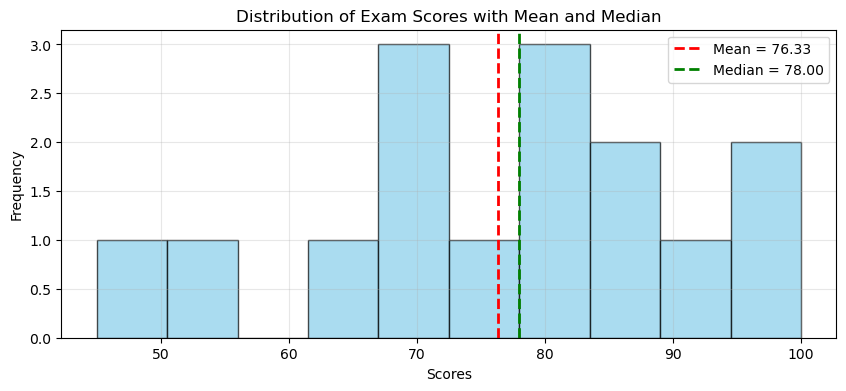

In [3]:
# Example: Computing Mean, Median, and Mode
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample dataset: exam scores
scores = np.array([45, 55, 62, 68, 70, 72, 75, 78, 80, 82, 85, 88, 90, 95, 100])

# Calculate measures
mean_score = np.mean(scores)
median_score = np.median(scores)
mode_result = stats.mode(scores, keepdims=True)
mode_score = mode_result.mode[0]

print(f"Mean: {mean_score:.2f}")
print(f"Median: {median_score:.2f}")
print(f"Mode: {mode_score}")

# Visualize
plt.figure(figsize=(10, 4))
plt.hist(scores, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_score:.2f}')
plt.axvline(median_score, color='green', linestyle='--', linewidth=2, label=f'Median = {median_score:.2f}')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores with Mean and Median')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 2. Measures of Spread (Variability)

Spread measures quantify how much observations vary from the center.

### 2.1 Variance
Average of squared deviations from the mean:

**Population variance:**
$$\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

**Sample variance (unbiased estimator):**
$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

**Key Points:**
- Measures average squared distance from the mean
- Always non-negative
- Units are squared (e.g., if data is in meters, variance is in meters²)
- If variance = 0, all values are identical
- Sensitive to outliers (due to squaring)

### 2.2 Standard Deviation
Square root of variance, bringing units back to original scale:

$$\sigma = \sqrt{\sigma^2}$$

**Key Points:**
- Same units as the original data (easier to interpret)
- Most commonly used measure of spread
- In a normal distribution:
  - ~68% of data falls within 1 standard deviation of the mean
  - ~95% within 2 standard deviations
  - ~99.7% within 3 standard deviations (empirical rule)
- Larger standard deviation = more variability
- Standard deviation of 0 means no variation

Low Spread Dataset:
  Mean: 50.00
  Variance: 2.50
  Standard Deviation: 1.58

High Spread Dataset:
  Mean: 50.00
  Variance: 250.00
  Standard Deviation: 15.81


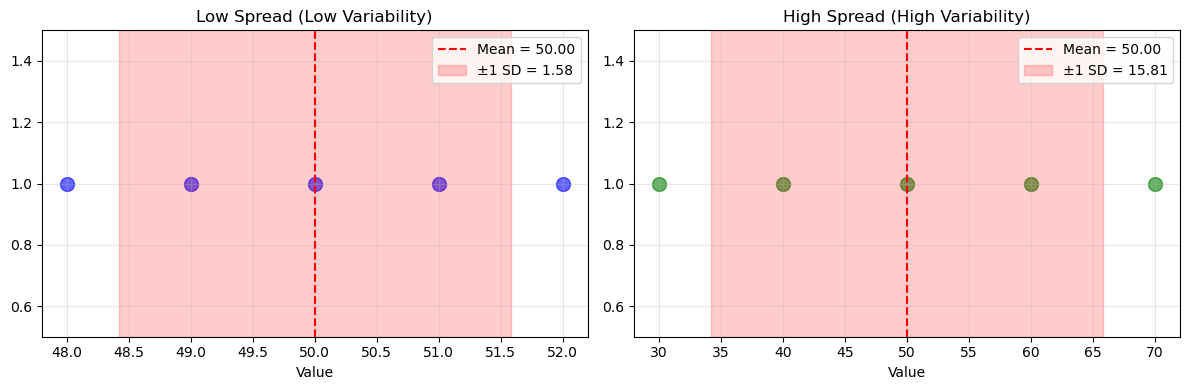

In [4]:
# Example: Variance and Standard Deviation
import numpy as np
import matplotlib.pyplot as plt

# Two datasets with different spreads
data_low_spread = np.array([48, 49, 50, 51, 52])
data_high_spread = np.array([30, 40, 50, 60, 70])

# Calculate statistics
mean_low = np.mean(data_low_spread)
mean_high = np.mean(data_high_spread)
std_low = np.std(data_low_spread, ddof=1)  # sample std
std_high = np.std(data_high_spread, ddof=1)
var_low = np.var(data_low_spread, ddof=1)
var_high = np.var(data_high_spread, ddof=1)

print("Low Spread Dataset:")
print(f"  Mean: {mean_low:.2f}")
print(f"  Variance: {var_low:.2f}")
print(f"  Standard Deviation: {std_low:.2f}\n")

print("High Spread Dataset:")
print(f"  Mean: {mean_high:.2f}")
print(f"  Variance: {var_high:.2f}")
print(f"  Standard Deviation: {std_high:.2f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(data_low_spread, [1]*len(data_low_spread), s=100, alpha=0.6, color='blue')
axes[0].axvline(mean_low, color='red', linestyle='--', label=f'Mean = {mean_low:.2f}')
axes[0].axvspan(mean_low - std_low, mean_low + std_low, alpha=0.2, color='red', label=f'±1 SD = {std_low:.2f}')
axes[0].set_title('Low Spread (Low Variability)')
axes[0].set_xlabel('Value')
axes[0].set_ylim(0.5, 1.5)
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].scatter(data_high_spread, [1]*len(data_high_spread), s=100, alpha=0.6, color='green')
axes[1].axvline(mean_high, color='red', linestyle='--', label=f'Mean = {mean_high:.2f}')
axes[1].axvspan(mean_high - std_high, mean_high + std_high, alpha=0.2, color='red', label=f'±1 SD = {std_high:.2f}')
axes[1].set_title('High Spread (High Variability)')
axes[1].set_xlabel('Value')
axes[1].set_ylim(0.5, 1.5)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Percentiles, Quartiles, IQR, and Z-score

### 3.1 Percentiles
A percentile is a value below which a given percentage of observations fall.

**Key Points:**
- 50th percentile = median
- 90th percentile means 90% of data is below this value
- Used to understand relative position in a dataset
- Common in standardized testing (e.g., "scored in the 95th percentile")

### 3.2 Quartiles
Quartiles divide the dataset into four equal parts:

- **Q1 (First Quartile):** 25th percentile
- **Q2 (Second Quartile):** 50th percentile (median)
- **Q3 (Third Quartile):** 75th percentile

**Key Points:**
- Q1 marks the boundary of the lowest 25% of data
- Q2 (median) divides data into two halves
- Q3 marks the boundary of the highest 25% of data
- Used heavily in box plots

### 3.3 Interquartile Range (IQR)
The range of the middle 50% of data:

$$\text{IQR} = Q_3 - Q_1$$

**Key Points:**
- Measures spread of the central portion of data
- Robust to outliers (not affected by extreme values)
- Larger IQR = more variability in the middle data
- Used for outlier detection
- Preferred over standard deviation for skewed data

### 3.4 Z-Score (Standard Score)
Measures how many standard deviations a value is from the mean:

$$z = \frac{x - \bar{x}}{\sigma}$$

**Key Points:**
- **z = 0:** Value equals the mean
- **z = 1:** Value is 1 standard deviation above the mean
- **z = -1:** Value is 1 standard deviation below the mean
- **|z| = 2:** Value is 2 standard deviations from the mean (unusual)
- **|z| > 3:** Very rare in normal distributions (potential outlier)
- Positive z-score = above average
- Negative z-score = below average
- Used for standardization and outlier detection

Quartile Analysis:
Q1 (25th percentile): 68.0
Q2 (50th percentile/Median): 80.0
Q3 (75th percentile): 90.0
IQR (Q3 - Q1): 22.0

Sample Z-scores:
Score 45: z-score = -2.01
Score 80: z-score = 0.14
Score 100: z-score = 1.37


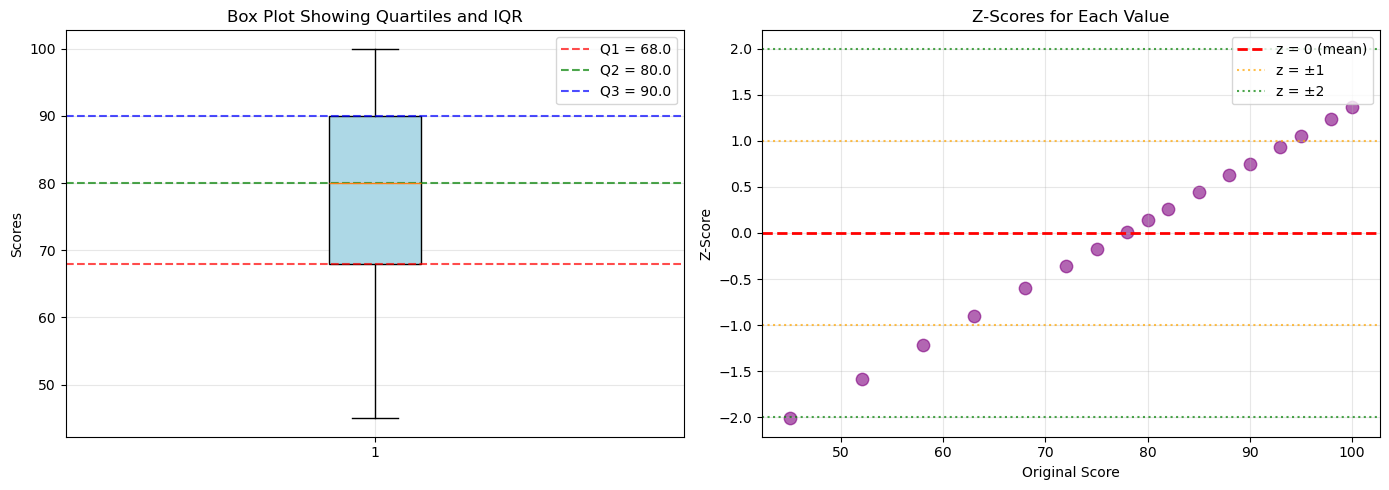

In [5]:
# Example: Quartiles, IQR, and Z-scores
import numpy as np
import matplotlib.pyplot as plt

# Sample data: test scores
scores = np.array([45, 52, 58, 63, 68, 72, 75, 78, 80, 82, 85, 88, 90, 93, 95, 98, 100])

# Calculate quartiles and IQR
q1 = np.percentile(scores, 25)
q2 = np.percentile(scores, 50)  # median
q3 = np.percentile(scores, 75)
iqr = q3 - q1

print("Quartile Analysis:")
print(f"Q1 (25th percentile): {q1}")
print(f"Q2 (50th percentile/Median): {q2}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR (Q3 - Q1): {iqr}\n")

# Calculate z-scores
mean_score = np.mean(scores)
std_score = np.std(scores, ddof=1)
z_scores = (scores - mean_score) / std_score

print("Sample Z-scores:")
for i in [0, len(scores)//2, -1]:
    print(f"Score {scores[i]}: z-score = {z_scores[i]:.2f}")

# Visualize with box plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
bp = axes[0].boxplot(scores, vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
axes[0].set_ylabel('Scores')
axes[0].set_title('Box Plot Showing Quartiles and IQR')
axes[0].axhline(q1, color='red', linestyle='--', alpha=0.7, label=f'Q1 = {q1}')
axes[0].axhline(q2, color='green', linestyle='--', alpha=0.7, label=f'Q2 = {q2}')
axes[0].axhline(q3, color='blue', linestyle='--', alpha=0.7, label=f'Q3 = {q3}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Z-score visualization
axes[1].scatter(scores, z_scores, s=80, alpha=0.6, color='purple')
axes[1].axhline(0, color='red', linestyle='--', linewidth=2, label='z = 0 (mean)')
axes[1].axhline(1, color='orange', linestyle=':', alpha=0.7, label='z = ±1')
axes[1].axhline(-1, color='orange', linestyle=':', alpha=0.7)
axes[1].axhline(2, color='green', linestyle=':', alpha=0.7, label='z = ±2')
axes[1].axhline(-2, color='green', linestyle=':', alpha=0.7)
axes[1].set_xlabel('Original Score')
axes[1].set_ylabel('Z-Score')
axes[1].set_title('Z-Scores for Each Value')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Distribution Shapes and Characteristics

### 4.1 Symmetric Distributions
Data is evenly distributed around the center.

**Characteristics:**
- Mean ≈ Median ≈ Mode
- Mirror image on both sides of center
- Normal (bell-shaped) distribution is a classic example
- Equal tails on both sides

**Key Points:**
- Mean and standard deviation work well
- Easier to make statistical inferences
- Many statistical tests assume symmetry

### 4.2 Skewed Distributions

**Right-skewed (Positive skew):**
- Long tail extends to the right
- Mean > Median > Mode
- Most data concentrated on the left
- Examples: income, house prices, reaction times

**Left-skewed (Negative skew):**
- Long tail extends to the left
- Mode > Median > Mean
- Most data concentrated on the right
- Examples: age at retirement, test scores with ceiling effect

**Key Points:**
- Mean is pulled toward the tail
- Median better represents the "typical" value
- Use median and IQR for summary statistics
- Skewness indicates asymmetry

### 4.3 Long Tails and Heavy-Tailed Distributions

Distributions with more extreme values than expected in a normal distribution.

**Key Points:**
- More probability in the tails (extreme events)
- Mean and standard deviation can be misleading
- Outliers are more common
- Examples: financial returns, earthquake magnitudes
- Require robust statistics (median, IQR)
- Risk management needs special attention to tails

Symmetric (Normal):
  Mean: 50.19
  Median: 50.25
  Std Dev: 9.79
  Skewness: 0.12

Right-Skewed:
  Mean: 20.16
  Median: 14.52
  Std Dev: 20.06
  Skewness: 1.98

Left-Skewed:
  Mean: 80.53
  Median: 86.47
  Std Dev: 18.91
  Skewness: -1.64



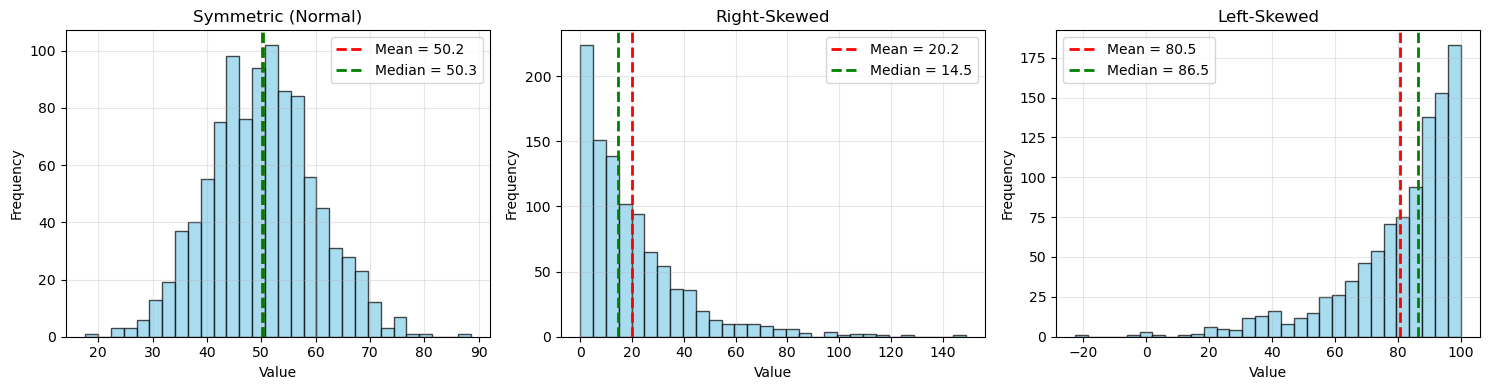

In [6]:
# Example: Comparing Distribution Shapes
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate different distributions
np.random.seed(42)
symmetric = np.random.normal(50, 10, 1000)
right_skewed = np.random.exponential(20, 1000)
left_skewed = 100 - np.random.exponential(20, 1000)

# Calculate statistics for each
distributions = {
    'Symmetric (Normal)': symmetric,
    'Right-Skewed': right_skewed,
    'Left-Skewed': left_skewed
}

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (name, data) in enumerate(distributions.items()):
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    # Plot histogram
    axes[idx].hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median = {median_val:.1f}')
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)
    
    # Print statistics
    print(f"{name}:")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Std Dev: {np.std(data, ddof=1):.2f}")
    print(f"  Skewness: {stats.skew(data):.2f}\n")

plt.tight_layout()
plt.show()

## 5. Outlier Detection with IQR Fences

The IQR method identifies outliers using "fences" beyond which values are considered unusual.

### IQR Fence Formula

**Lower fence:**
$$\text{Lower Fence} = Q_1 - 1.5 \times \text{IQR}$$

**Upper fence:**
$$\text{Upper Fence} = Q_3 + 1.5 \times \text{IQR}$$

Any value below the lower fence or above the upper fence is flagged as a potential outlier.

**Key Points:**
- Factor of 1.5 is standard but can be adjusted (e.g., 3.0 for extreme outliers)
- Non-parametric method (doesn't assume normal distribution)
- Robust to the outliers themselves
- Outliers may indicate:
  - Data entry errors
  - Measurement errors
  - True extreme values (important events)
  - Different population/process
- **Don't automatically remove outliers** — investigate first!

Q1: 43.98
Q3: 55.13
IQR: 11.15
Lower Fence: 27.26
Upper Fence: 71.86

Number of outliers detected: 6
Outlier values: [10.0, 15.0, 23.802548959102555, 90.0, 95.0, 100.0]


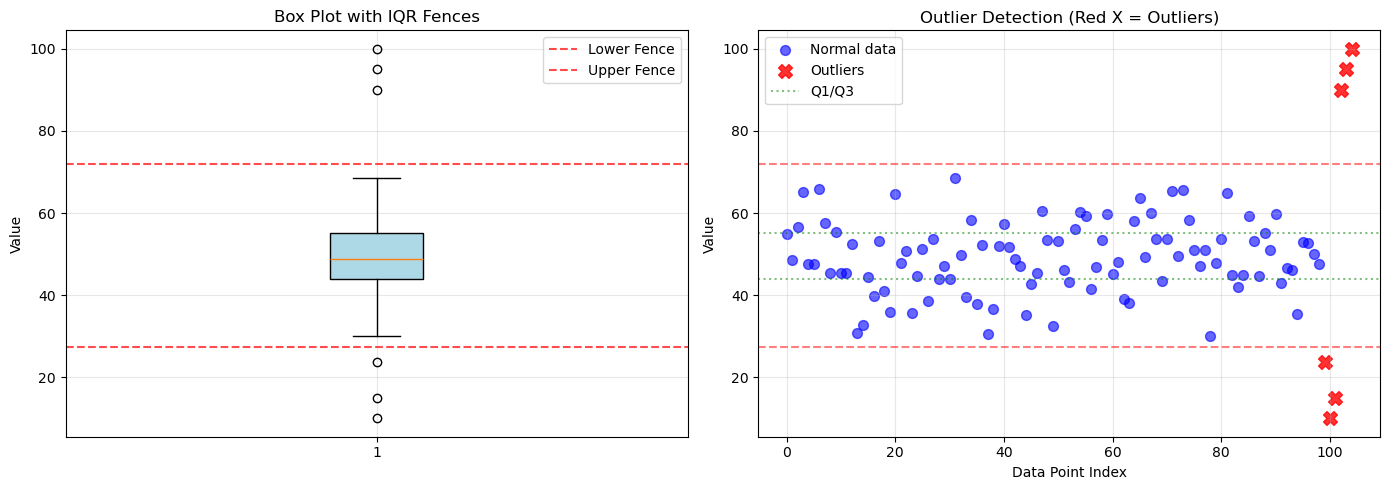

In [7]:
# Example: Outlier Detection with IQR Method
import numpy as np
import matplotlib.pyplot as plt

# Sample data with outliers
np.random.seed(42)
normal_data = np.random.normal(50, 10, 100)
outliers = np.array([10, 15, 90, 95, 100])  # Add clear outliers
data = np.concatenate([normal_data, outliers])

# Calculate quartiles and IQR
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# Calculate fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

# Identify outliers
outliers_mask = (data < lower_fence) | (data > upper_fence)
outliers_detected = data[outliers_mask]
normal_data_filtered = data[~outliers_mask]

print(f"Q1: {q1:.2f}")
print(f"Q3: {q3:.2f}")
print(f"IQR: {iqr:.2f}")
print(f"Lower Fence: {lower_fence:.2f}")
print(f"Upper Fence: {upper_fence:.2f}")
print(f"\nNumber of outliers detected: {len(outliers_detected)}")
print(f"Outlier values: {sorted(outliers_detected)}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot with outliers marked
bp = axes[0].boxplot(data, vert=True, patch_artist=True, showfliers=True)
bp['boxes'][0].set_facecolor('lightblue')
axes[0].axhline(lower_fence, color='red', linestyle='--', alpha=0.7, label='Lower Fence')
axes[0].axhline(upper_fence, color='red', linestyle='--', alpha=0.7, label='Upper Fence')
axes[0].set_ylabel('Value')
axes[0].set_title('Box Plot with IQR Fences')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Scatter plot showing all data points
axes[1].scatter(range(len(normal_data_filtered)), normal_data_filtered, 
               color='blue', alpha=0.6, label='Normal data', s=50)
axes[1].scatter(range(len(normal_data_filtered), len(data)), outliers_detected,
               color='red', alpha=0.8, label='Outliers', s=100, marker='X')
axes[1].axhline(lower_fence, color='red', linestyle='--', alpha=0.5)
axes[1].axhline(upper_fence, color='red', linestyle='--', alpha=0.5)
axes[1].axhline(q1, color='green', linestyle=':', alpha=0.5, label='Q1/Q3')
axes[1].axhline(q3, color='green', linestyle=':', alpha=0.5)
axes[1].set_xlabel('Data Point Index')
axes[1].set_ylabel('Value')
axes[1].set_title('Outlier Detection (Red X = Outliers)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. When to Prefer Median and IQR Over Mean and Standard Deviation

### Decision Guide

| **Situation** | **Preferred Measure** | **Reason** |
|--------------|---------------------|-----------|
| Symmetric distribution, no outliers | Mean & Standard Deviation | Most efficient, uses all data |
| Skewed distribution | Median & IQR | Resistant to tail effects |
| Presence of outliers | Median & IQR | Not influenced by extreme values |
| Small sample with extreme values | Median & IQR | More stable estimate |
| Ordinal data | Median & IQR | Mean not meaningful for ranks |
| Income/wealth data | Median & IQR | Typically right-skewed |
| Normal theory tests needed | Mean & Standard Deviation | Required for parametric tests |
| Reporting "typical" experience | Median | Better reflects common experience |

### Key Reasons to Use Median and IQR

**1. Robustness**
- Not affected by extreme values
- Changing the most extreme value doesn't change median/IQR
- Example: Median household income vs mean household income

**2. Skewed Data**
- Mean is pulled toward the tail
- Median stays near the bulk of data
- Better represents "typical" value

**3. Outlier Presence**
- One extreme value can dramatically affect mean and SD
- Median and IQR remain stable
- More reliable summary

**4. Data Quality Issues**
- When measurement errors are suspected
- When data entry problems exist
- When you can't verify extreme values

**5. Intuitive Interpretation**
- "Half the values are above/below the median"
- "Middle 50% of values fall in this range (IQR)"
- Easier to explain to non-technical audiences

Comparison: Impact of Outliers

Without Outlier:
  Mean: 58.50
  Median: 59.00
  Std Dev: 8.09
  IQR: 11.50

With Outlier (500):
  Mean: 101.50
  Median: 59.00
  Std Dev: 140.19
  IQR: 11.50


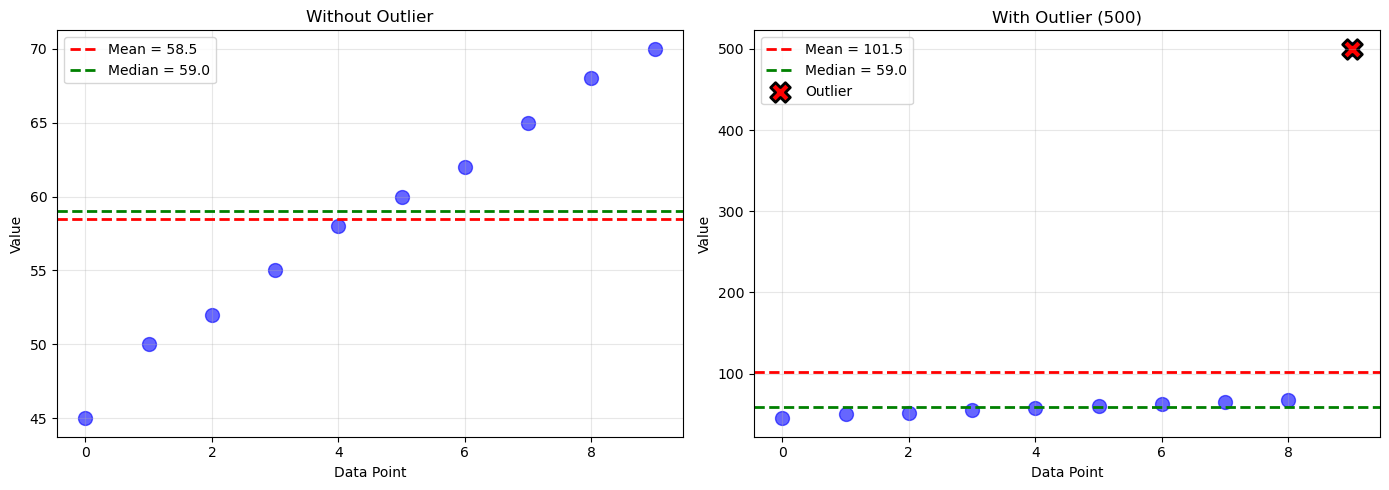


Key Observation:
- Median barely changed (58.0 → 59.0)
- Mean shifted dramatically (58.5 → 101.5)
- IQR remained stable
- Standard deviation increased significantly

Conclusion: Median and IQR are ROBUST to outliers!


In [8]:
# Example: Demonstrating Robustness of Median vs Mean
import numpy as np
import matplotlib.pyplot as plt

# Create two datasets: one normal, one with an outlier
np.random.seed(42)
normal_data = np.array([45, 50, 52, 55, 58, 60, 62, 65, 68, 70])
data_with_outlier = np.array([45, 50, 52, 55, 58, 60, 62, 65, 68, 500])  # 500 is outlier

# Calculate statistics
datasets = {
    'Without Outlier': normal_data,
    'With Outlier (500)': data_with_outlier
}

print("Comparison: Impact of Outliers\n" + "="*50)
for name, data in datasets.items():
    mean_val = np.mean(data)
    median_val = np.median(data)
    std_val = np.std(data, ddof=1)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr_val = q3 - q1
    
    print(f"\n{name}:")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Std Dev: {std_val:.2f}")
    print(f"  IQR: {iqr_val:.2f}")

# Visualize the impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, (name, data) in enumerate(datasets.items()):
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    axes[idx].scatter(range(len(data)), data, s=100, alpha=0.6, color='blue')
    axes[idx].axhline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.1f}')
    axes[idx].axhline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median = {median_val:.1f}')
    axes[idx].set_xlabel('Data Point')
    axes[idx].set_ylabel('Value')
    axes[idx].set_title(name)
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)
    
    # Highlight outlier if present
    if idx == 1:
        axes[idx].scatter(9, 500, s=200, color='red', marker='X', 
                        label='Outlier', edgecolor='black', linewidth=2)
        axes[idx].legend()

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Key Observation:")
print("- Median barely changed (58.0 → 59.0)")
print("- Mean shifted dramatically (58.5 → 101.5)")
print("- IQR remained stable")
print("- Standard deviation increased significantly")
print("\nConclusion: Median and IQR are ROBUST to outliers!")

## 7. Summary: Quick Reference Guide

### Formulas Cheat Sheet

| **Measure** | **Formula** | **When to Use** |
|------------|------------|----------------|
| **Mean** | $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$ | Symmetric data, no outliers |
| **Median** | Middle value when sorted | Skewed data, outliers present |
| **Mode** | Most frequent value | Categorical data, finding common value |
| **Variance** | $\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$ | Measuring spread (squared units) |
| **Std Dev** | $\sigma = \sqrt{\sigma^2}$ | Measuring spread (original units) |
| **IQR** | $Q_3 - Q_1$ | Robust measure of spread |
| **Z-score** | $z = \frac{x - \bar{x}}{\sigma}$ | Standardization, outlier detection |
| **Lower Fence** | $Q_1 - 1.5 \times \text{IQR}$ | Outlier detection |
| **Upper Fence** | $Q_3 + 1.5 \times \text{IQR}$ | Outlier detection |

### Key Takeaways

**1. Central Tendency**
   - Mean: Best for symmetric data, sensitive to outliers
   - Median: Robust to outliers, better for skewed data
   - Mode: Most common value, useful for categorical data

**2. Spread**
   - Standard deviation: Most common, requires symmetric data
   - IQR: Robust alternative for skewed data or outliers

**3. Z-scores**
   - z = 0: Value equals the mean
   - |z| < 2: Typical values (within ~95% of data)
   - |z| > 3: Unusual values (potential outliers)

**4. Distribution Shapes**
   - Symmetric: Mean ≈ Median
   - Right-skewed: Mean > Median
   - Left-skewed: Mean < Median

**5. Outlier Detection**
   - Use IQR fences: $Q_1 - 1.5 \times \text{IQR}$ and $Q_3 + 1.5 \times \text{IQR}$
   - Always investigate outliers before removing

**6. When to Use Median & IQR**
   - Skewed distributions
   - Presence of outliers
   - Ordinal data
   - Data quality concerns
   - Reporting "typical" experience to general audiences

## 8. Practice Exercise

Try these exercises to reinforce your learning:

**Dataset:** `[12, 15, 18, 20, 22, 25, 28, 30, 35, 100]`

1. Calculate the mean, median, and mode
2. Calculate the variance and standard deviation
3. Find Q1, Q3, and IQR
4. Identify any outliers using the IQR method
5. Calculate the z-score for the value 100
6. Explain why the median is more appropriate than the mean for this dataset

**Run the code below to check your answers!**

In [9]:
# Practice Exercise Solution
import numpy as np
from scipy import stats

# Dataset
data = np.array([12, 15, 18, 20, 22, 25, 28, 30, 35, 100])

# 1. Central tendency
mean_val = np.mean(data)
median_val = np.median(data)
mode_result = stats.mode(data, keepdims=True)
mode_val = mode_result.mode[0] if mode_result.count[0] > 1 else "No mode (all unique)"

print("=" * 50)
print("PRACTICE EXERCISE SOLUTIONS")
print("=" * 50)
print(f"\n1. Central Tendency:")
print(f"   Mean: {mean_val:.2f}")
print(f"   Median: {median_val:.2f}")
print(f"   Mode: {mode_val}")

# 2. Spread
variance = np.var(data, ddof=1)
std_dev = np.std(data, ddof=1)

print(f"\n2. Measures of Spread:")
print(f"   Variance: {variance:.2f}")
print(f"   Standard Deviation: {std_dev:.2f}")

# 3. Quartiles and IQR
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

print(f"\n3. Quartiles and IQR:")
print(f"   Q1 (25th percentile): {q1:.2f}")
print(f"   Q3 (75th percentile): {q3:.2f}")
print(f"   IQR: {iqr:.2f}")

# 4. Outlier detection
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
outliers = data[(data < lower_fence) | (data > upper_fence)]

print(f"\n4. Outlier Detection:")
print(f"   Lower Fence: {lower_fence:.2f}")
print(f"   Upper Fence: {upper_fence:.2f}")
print(f"   Outliers: {outliers}")

# 5. Z-score for 100
z_score_100 = (100 - mean_val) / std_dev

print(f"\n5. Z-score for value 100:")
print(f"   Z-score: {z_score_100:.2f}")
print(f"   Interpretation: {100} is {z_score_100:.2f} standard deviations above the mean")

# 6. Explanation
print(f"\n6. Why Median is More Appropriate:")
print(f"   - The value 100 is an extreme outlier")
print(f"   - Mean ({mean_val:.2f}) is pulled up by this outlier")
print(f"   - Median ({median_val:.2f}) better represents the 'typical' value")
print(f"   - 9 out of 10 values are below the mean!")
print(f"   - The data is right-skewed due to the outlier")

print("\n" + "=" * 50)

PRACTICE EXERCISE SOLUTIONS

1. Central Tendency:
   Mean: 30.50
   Median: 23.50
   Mode: No mode (all unique)

2. Measures of Spread:
   Variance: 645.39
   Standard Deviation: 25.40

3. Quartiles and IQR:
   Q1 (25th percentile): 18.50
   Q3 (75th percentile): 29.50
   IQR: 11.00

4. Outlier Detection:
   Lower Fence: 2.00
   Upper Fence: 46.00
   Outliers: [100]

5. Z-score for value 100:
   Z-score: 2.74
   Interpretation: 100 is 2.74 standard deviations above the mean

6. Why Median is More Appropriate:
   - The value 100 is an extreme outlier
   - Mean (30.50) is pulled up by this outlier
   - Median (23.50) better represents the 'typical' value
   - 9 out of 10 values are below the mean!
   - The data is right-skewed due to the outlier

